In [10]:
import os
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle as pkl
sns.set_style("darkgrid")

In [2]:
os.chdir('../') # Change working directory to root repository path

# 1. Choose the model to score

In [27]:
name_data = '/mnt/archive/data/synthetic_data' # Replace with path of dataset
scheme = '64_points_3_shell'
snr_init = 20


ground_truth_path = os.path.join(name_data, 'ground_truth')
split_path = os.path.join(ground_truth_path, 'split', 'split_1.pkl')
result_path = os.path.join(name_data, scheme, '{0}_snr'.format(snr_init), 'gradients', 'result')

In [28]:
print('Available model: ')
for model in np.sort(os.listdir(result_path)):
    if 'fodf' in os.listdir(os.path.join(result_path, model)):
        if 'fodf_cat' in os.listdir(os.path.join(result_path, model, 'fodf')):
            if 'fodf.nii' in os.listdir(os.path.join(result_path, model, 'fodf', 'fodf_cat')):
                print(model)

Available model: 
16_02_2021_16_21_02
msmt_dhollander_10_None_None


# 2. fODF vizualisation (coming soon)

# 3. Score the model - Validation + Test

In [31]:
model = '16_02_2021_16_21_02'
model_path = os.path.join(result_path, model)
fodf_path = os.path.join(model_path, 'fodf')

n_save = 1000
name_grid = 'equiangular_64'
path_grid = os.path.join('grid', name_grid)
sep_min = 15.0
max_fiber = 3
thresholds = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9]

In [32]:
cmd = 'python generate_result/1_interpolate_fodf.py --path {0} --n_save {1} --name_grid {2} --path_grid {3}'.format(fodf_path, n_save, name_grid, path_grid)
print(cmd)
os.system(cmd)
for threshold in thresholds:
    cmd = 'python generate_result/2_compute_prediction.py --result_path {0} --path_grid {1} --name_grid {2} --threshold {3} --sep_min {4} --max_fiber {5} --n_save {6}'.format(model_path, path_grid, name_grid, threshold, sep_min, max_fiber, n_save)
    print(cmd)
    os.system(cmd)
    angles_predicted_path = os.path.join(model_path, 'angles_predicted', 'fodf_{0}'.format(name_grid), '{0}_threshold_{1}_min_{2}_fiber'.format(threshold, sep_min, max_fiber))
    cmd = 'python generate_result/3_compute_result.py --result_path {0} --ground_truth_path {1} --split {2} --max_fiber {3}'.format(angles_predicted_path, ground_truth_path, split_path, max_fiber)
    cmd += ' --validation'
    print(cmd)
    os.system(cmd)
    angles_predicted_path = os.path.join(model_path, 'angles_predicted', 'fodf_{0}'.format(name_grid), '{0}_threshold_{1}_min_{2}_fiber'.format(threshold, sep_min, max_fiber))
    cmd = 'python generate_result/3_compute_result.py --result_path {0} --ground_truth_path {1} --split {2} --max_fiber {3}'.format(angles_predicted_path, ground_truth_path, split_path, max_fiber)
    print(cmd)
    os.system(cmd)
    os.system(cmd)
    angles_predicted_path = os.path.join(model_path, 'angles_predicted', 'fodf_{0}'.format(name_grid), '{0}_threshold_{1}_min_{2}_fiber'.format(threshold, sep_min, max_fiber))
    cmd = 'python generate_result/3_compute_result.py --result_path {0} --ground_truth_path {1} --split {2} --max_fiber {3}'.format(angles_predicted_path, ground_truth_path, split_path, max_fiber)
    cmd += ' --train'
    print(cmd)
    os.system(cmd)
os.system('rm -r '+fodf_path+'/fodf_equiangular_64')

python generate_result/1_interpolate_fodf.py --path /mnt/archive/data/synthetic_data/64_points_3_shell/20_snr/gradients/result/16_02_2021_16_21_02/fodf --n_save 1000 --name_grid equiangular_64 --path_grid grid/equiangular_64
python generate_result/2_compute_prediction.py --result_path /mnt/archive/data/synthetic_data/64_points_3_shell/20_snr/gradients/result/16_02_2021_16_21_02 --path_grid grid/equiangular_64 --name_grid equiangular_64 --threshold 0.1 --sep_min 15.0 --max_fiber 3 --n_save 1000
python generate_result/3_compute_result.py --result_path /mnt/archive/data/synthetic_data/64_points_3_shell/20_snr/gradients/result/16_02_2021_16_21_02/angles_predicted/fodf_equiangular_64/0.1_threshold_15.0_min_3_fiber --ground_truth_path /mnt/archive/data/synthetic_data/ground_truth --split /mnt/archive/data/synthetic_data/ground_truth/split/split_1.pkl --max_fiber 3 --validation
python generate_result/3_compute_result.py --result_path /mnt/archive/data/synthetic_data/64_points_3_shell/20_snr/g

python generate_result/3_compute_result.py --result_path /mnt/archive/data/synthetic_data/64_points_3_shell/20_snr/gradients/result/16_02_2021_16_21_02/angles_predicted/fodf_equiangular_64/0.35_threshold_15.0_min_3_fiber --ground_truth_path /mnt/archive/data/synthetic_data/ground_truth --split /mnt/archive/data/synthetic_data/ground_truth/split/split_1.pkl --max_fiber 3 --train
python generate_result/2_compute_prediction.py --result_path /mnt/archive/data/synthetic_data/64_points_3_shell/20_snr/gradients/result/16_02_2021_16_21_02 --path_grid grid/equiangular_64 --name_grid equiangular_64 --threshold 0.4 --sep_min 15.0 --max_fiber 3 --n_save 1000
python generate_result/3_compute_result.py --result_path /mnt/archive/data/synthetic_data/64_points_3_shell/20_snr/gradients/result/16_02_2021_16_21_02/angles_predicted/fodf_equiangular_64/0.4_threshold_15.0_min_3_fiber --ground_truth_path /mnt/archive/data/synthetic_data/ground_truth --split /mnt/archive/data/synthetic_data/ground_truth/split

python generate_result/3_compute_result.py --result_path /mnt/archive/data/synthetic_data/64_points_3_shell/20_snr/gradients/result/16_02_2021_16_21_02/angles_predicted/fodf_equiangular_64/0.65_threshold_15.0_min_3_fiber --ground_truth_path /mnt/archive/data/synthetic_data/ground_truth --split /mnt/archive/data/synthetic_data/ground_truth/split/split_1.pkl --max_fiber 3 --train
python generate_result/2_compute_prediction.py --result_path /mnt/archive/data/synthetic_data/64_points_3_shell/20_snr/gradients/result/16_02_2021_16_21_02 --path_grid grid/equiangular_64 --name_grid equiangular_64 --threshold 0.7 --sep_min 15.0 --max_fiber 3 --n_save 1000
python generate_result/3_compute_result.py --result_path /mnt/archive/data/synthetic_data/64_points_3_shell/20_snr/gradients/result/16_02_2021_16_21_02/angles_predicted/fodf_equiangular_64/0.7_threshold_15.0_min_3_fiber --ground_truth_path /mnt/archive/data/synthetic_data/ground_truth --split /mnt/archive/data/synthetic_data/ground_truth/split

0

# 4. Find best peak detection on validation

In [35]:
d = ['split', 'threshold', 'success rate', 'angular error', 'over-estimated', 'under-estimated', 'fiber', 'n fiber']
split = ['train', 'val', 'test']
p = ['success_rate.pkl',
 'over_estimated_fiber.pkl',
 'under_estimated_fiber.pkl',
 'angular_error.pkl',
 'angle_information.pkl']

df = pd.DataFrame(columns=d)

for t in thresholds:
    for s in split:
        r = []
        for file in p:
            r.append(pkl.load(open('{0}/angles_predicted/fodf_equiangular_64/{1}_threshold_{2}_min_{3}_fiber/results/{4}_{5}'.format(model_path, t, sep_min, max_fiber, s, file), 'rb')))

        sr = []
        ae = []
        oe = []
        ue = []
        n_f = []
        for l in range(len(r[0])):
            n_f_ = len(r[0][l])
            sr_ = np.mean(r[0][l])*100
            ae_ = np.mean(r[3][l])*180/np.pi
            oe_ = np.mean(r[1][l])
            ue_ = np.mean(r[2][l])
            df2 = pd.DataFrame([[s, t, sr_, ae_, oe_, ue_, str(l+1), n_f_]], columns=d)
            df = df.append(df2)
            sr.append(sr_*n_f_)
            ae.append(ae_*n_f_)
            oe.append(oe_*n_f_)
            ue.append(ue_*n_f_)
            n_f.append(n_f_)
        df2 = pd.DataFrame([[s, t, sum(sr)/sum(n_f), sum(ae)/sum(n_f), sum(oe)/sum(n_f), sum(ue)/sum(n_f), 'T', sum(n_f)]], columns=d)
        df = df.append(df2)
        


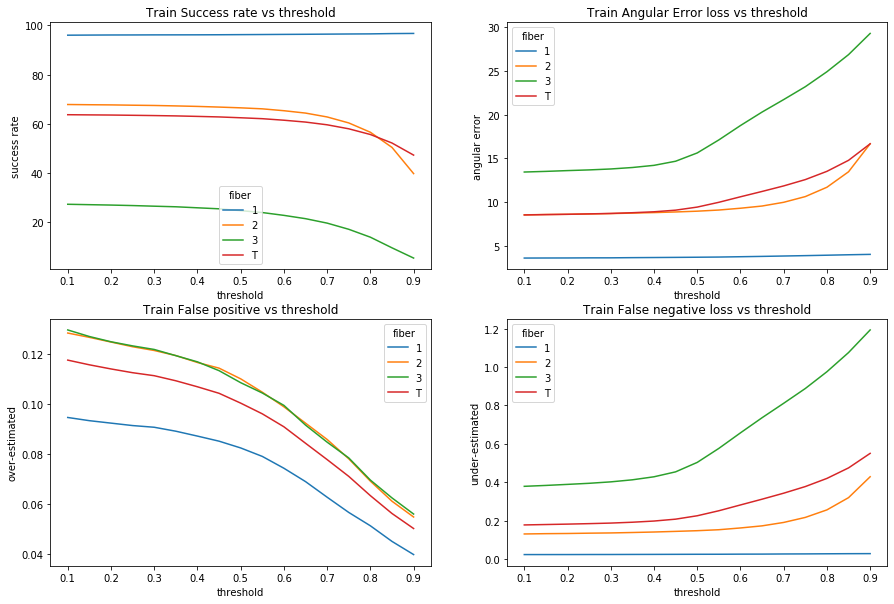

In [36]:
plt.figure(figsize=(15,10))
plt.subplot(221)
sns.lineplot(data=df[df['split']=='train'], x='threshold', y='success rate', hue='fiber')
plt.title('Train Success rate vs threshold')
plt.subplot(222)
sns.lineplot(data=df[df['split']=='train'], x='threshold', y='angular error', hue='fiber')
plt.title('Train Angular Error loss vs threshold')
plt.subplot(223)
sns.lineplot(data=df[df['split']=='train'], x='threshold', y='over-estimated', hue='fiber')
plt.title('Train False positive vs threshold')
plt.subplot(224)
sns.lineplot(data=df[df['split']=='train'], x='threshold', y='under-estimated', hue='fiber')
plt.title('Train False negative loss vs threshold')
plt.show()

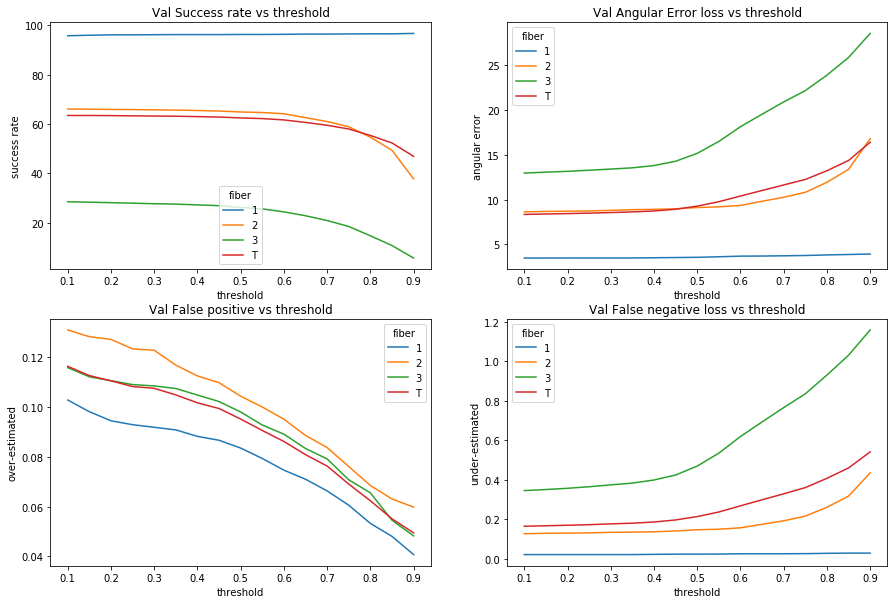

In [37]:
plt.figure(figsize=(15,10))
plt.subplot(221)
sns.lineplot(data=df[df['split']=='val'], x='threshold', y='success rate', hue='fiber')
plt.title('Val Success rate vs threshold')
plt.subplot(222)
sns.lineplot(data=df[df['split']=='val'], x='threshold', y='angular error', hue='fiber')
plt.title('Val Angular Error loss vs threshold')
plt.subplot(223)
sns.lineplot(data=df[df['split']=='val'], x='threshold', y='over-estimated', hue='fiber')
plt.title('Val False positive vs threshold')
plt.subplot(224)
sns.lineplot(data=df[df['split']=='val'], x='threshold', y='under-estimated', hue='fiber')
plt.title('Val False negative loss vs threshold')
plt.show()

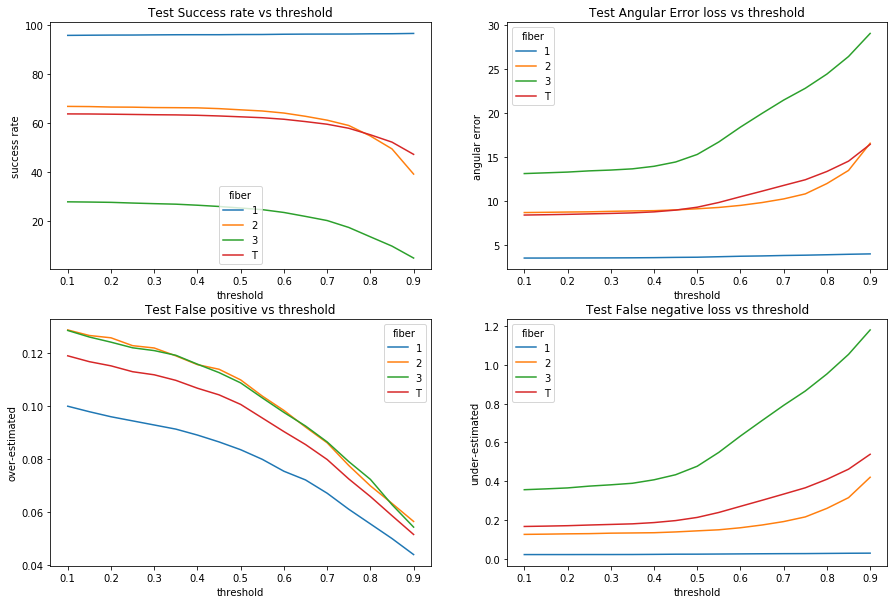

In [38]:
plt.figure(figsize=(15,10))
plt.subplot(221)
sns.lineplot(data=df[df['split']=='test'], x='threshold', y='success rate', hue='fiber')
plt.title('Test Success rate vs threshold')
plt.subplot(222)
sns.lineplot(data=df[df['split']=='test'], x='threshold', y='angular error', hue='fiber')
plt.title('Test Angular Error loss vs threshold')
plt.subplot(223)
sns.lineplot(data=df[df['split']=='test'], x='threshold', y='over-estimated', hue='fiber')
plt.title('Test False positive vs threshold')
plt.subplot(224)
sns.lineplot(data=df[df['split']=='test'], x='threshold', y='under-estimated', hue='fiber')
plt.title('Test False negative loss vs threshold')
plt.show()